The Fertilizers by Product dataset contains information on product amounts for the Production, Trade, Agriculture Use and Other Uses of chemical and mineral fertilizers products, over the time series 2002-present. The fertilizer statistics data are validated separately for a set of over thirty individual products. Both straight and compound fertilizers are included

Given dataset contain fertilizer and their import,export,production,agricultural use of different counteries.so our plan is to do a surver for indias fertilizer use. 

Pehle observation dekh lege fir questions frame kar lege

In [35]:
# Important librarys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [36]:
# dataset is big we have to clean it to only our used things
df = pd.read_csv('FertilizersProduct.csv', encoding = 'latin-1')
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [37]:
## Sirf india ka dataframe aur baki sare columns delete kar dete hai
df = df.loc[df.Area == 'India']
df.reset_index(inplace = True, drop = True) 
df.drop(columns = {'Area Code','Area','Year Code','Unit','Flag'}, inplace = True)
df.head()## it only prints first five rows

,Item Code,Item,Element Code,Element,Year,Value
0,4007,"Ammonia, anhydrous",5610,Import Quantity,2002,1279348.13
1,4007,"Ammonia, anhydrous",5610,Import Quantity,2003,979985.94
2,4007,"Ammonia, anhydrous",5610,Import Quantity,2004,1189895.82
3,4007,"Ammonia, anhydrous",5610,Import Quantity,2005,1731417.05
4,4007,"Ammonia, anhydrous",5610,Import Quantity,2006,1781431.57


Text(0.5,1,'Import/Export of fertilizer in India over the years')

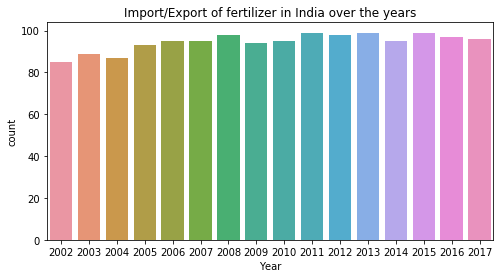

In [38]:
## First we visualize the number of imports/exports take place every year
plt.figure(figsize=(8,4)) ## setting size of plot
sns.countplot(x='Year',data=df); ## countplot is widely used in seaborn 
plt.title('Import/Export of fertilizer in India over the years')

# Imports

In [ ]:
Now one by one we take and observe only top fertilizers by pie charts and line graph

In [66]:
# Import Quantity
imp_qty = df.loc[df['Element Code'] == 5610] ## Extracting Imports quantity item 
imp_qty.drop(columns = {'Item Code','Element Code','Year'},inplace = True) ## deleting useless colums
## Fertilizer of every year ko sum karke decending order me sort karege to top import wale fertilizers hume milege

imp_qty = imp_qty.groupby(['Item'])["Value"].sum() ## sab fertilizer name se groupby kias then uska sum hume mila
imp_qty = imp_qty.reset_index() ## reshuffling indexes
imp_qty = imp_qty.sort_values("Value",ascending=False) ## decending sort of dataframe
imp_qty = imp_qty.reset_index(drop=True)## reshuffling indexes

## if we want to do eveything in single line the see next line dont get confused
#imp_qty = imp_qty.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
imp_qty

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Item,Value
0,Phosphate rock,96682378.35
1,Urea,76403811.19
2,Diammonium phosphate (DAP),58189247.39
3,Potassium chloride (muriate of potash) (MOP),53679824.56
4,"Ammonia, anhydrous",28782523.71
5,Other NP compounds,4539864.95
6,Monoammonium phosphate (MAP),4026177.54
7,Ammonium nitrate (AN),3019311.31
8,"Other potassic fertilizers, n.e.c.",2446204.78
9,NPK fertilizers,1727922.54


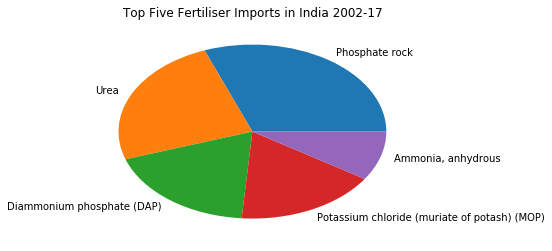

In [40]:
## Now to create pie charts for the top 5 imported fertilizers 

slices = imp_qty.head()['Value'] ## there values and head give only top 5 
labels = imp_qty.head()['Item']  ## Fertilizers name
plt.pie(slices, labels= labels)  ## ploting pie chart
plt.title('Top Five Fertiliser Imports in India 2002-17') ## Title 
plt.show()

### The top five imported fertilisers in India are-

Phosphate Rock,
Urea,
DAP,
MOP,
Ammonia, anhydrous
</p>
Let's take a look at their trends-


## Disclaminer:: Don't get nervous of this next code it is only for generating a fancy graph 

Text(0.5,1,'Top Five Fertiliser Imports in India 2002-17(tonnes)')

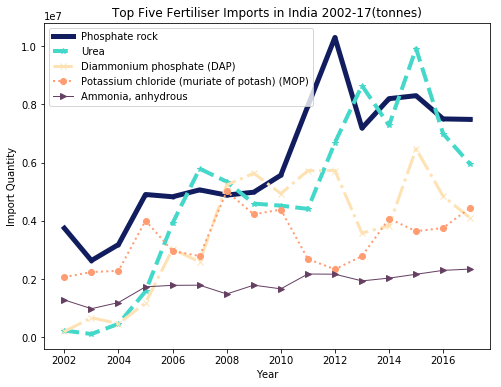

In [67]:

item = imp_qty.head()['Item'].unique() ## take top 5 imported fertilizers
k = 0
ls = ['-','--','-.',':','-']  ## for printing in line graph
mk = ['.','*','x','o','>']    ## for printing in line graph for marking of every year

plt.figure(figsize=(8,6))     ##Giving the figure size

for i in item:                ## i is the iterator forevery fertilizer
    x = df.loc[df['Item'] == i] ## taking out by fertilizer name
    x = x.loc[df['Element Code'] == 5610]  ## taking out import item only
    year = x['Year']    ## Now we get year
    value = x['Value']  ## value of import on corresponding year
    plt.xlabel('Year')   ## X-axis
    plt.ylabel('Import Quantity') ## Y-axis
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 5-k, marker = mk[k]) ## Fancy line graph :)
    k=k+1
    plt.legend()
plt.title('Top Five Fertiliser Imports in India 2002-17(tonnes)')

### Observations -

<p>The import of Urea was rising until 2015 after which it saw a sharp decline.</p>
Similar can be said about Phosphate rock, which after 2012 is having a constant imports
Ammonia, anhydrous did not experience much change in its import quantity throughout the years.

## Now we have  more things to do similary in a row an make pie chart and line graph of it and draw conclusions

# Import value

In [42]:
imp_val = df.loc[df['Element Code'] == 5622]
imp_val.drop(columns = {'Item Code','Element Code','Year'},inplace = True)
imp_val = imp_val.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
imp_val.head(5)

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Item,Value
0,Diammonium phosphate (DAP),30689646.47
1,Urea,22342967.19
2,Potassium chloride (muriate of potash) (MOP),17519316.35
3,Phosphate rock,11598407.50
4,"Ammonia, anhydrous",11155169.52


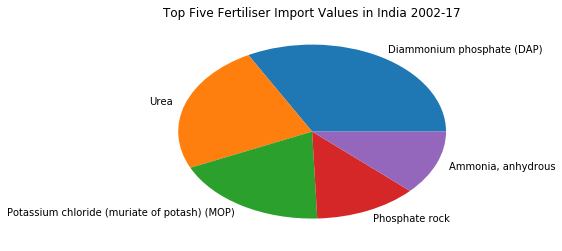

In [43]:
slices = imp_val.head()['Value']
labels = labels= imp_val.head()['Item']
plt.pie(slices, labels = labels)
plt.title('Top Five Fertiliser Import Values in India 2002-17')
plt.show()

Text(0.5,1,'Top Five Fertiliser Import Values in India 2002-17(in $1000 US)')

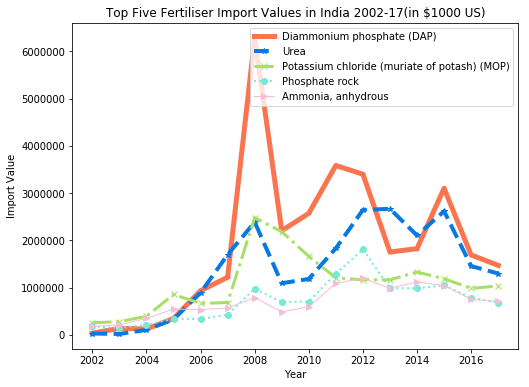

In [45]:
item = imp_val.head()['Item'].unique()
k = 0
ls = ['-','--','-.',':','-']
mk = ['.','*','x','o','>']
plt.figure(figsize=(8,6))
for i in item:
    x = df.loc[df['Item'] == i]
    x = x.loc[df['Element Code'] == 5622]
    year = x['Year']
    value = x['Value']
    plt.xlabel('Year')
    plt.ylabel('Import Value')
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 5-k, marker = mk[k])
    k=k+1
    plt.legend()
plt.title('Top Five Fertiliser Import Values in India 2002-17(in $1000 US)')

The most striking observation is that all five fertilisers had increase in thier import value in 2008, especially DAP, which might mean that their prices had increased. This might have happened because of the Global Financial Crisis in 2008. Part of the cause for these price rises was the rise in the price of oil, since the most fertilizers require petroleum or natural gas to manufacture.
We can also see that after this period, thier import values seemed to normalise


# Export

## Export quantity

In [46]:
exp_qty = df.loc[df['Element Code'] == 5910]
exp_qty.drop(columns = {'Item Code','Element Code','Year'},inplace = True)
exp_qty = exp_qty.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
exp_qty

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Item,Value
0,NPK fertilizers,626753.60
1,"Other nitrogenous fertilizers, n.e.c.",378694.82
2,Urea,185335.91
3,Potassium chloride (muriate of potash) (MOP),180019.69
4,Ammonium nitrate (AN),171624.63
5,Ammonium sulphate,147752.97
6,Diammonium phosphate (DAP),114389.53
7,Potassium sulphate (sulphate of potash) (SOP),113579.94
8,Monoammonium phosphate (MAP),96527.38
9,Superphosphates above 35%,68358.50


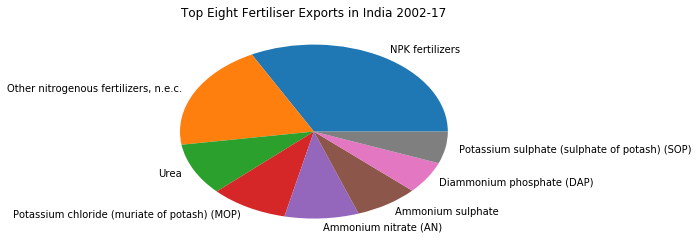

In [47]:
slices = exp_qty.head(8)['Value']
labels = labels= exp_qty.head(8)['Item']
plt.pie(slices, labels = labels)
plt.title('Top Eight Fertiliser Exports in India 2002-17')
plt.show()

Text(0.5,1,'Top Five Fertiliser Exports in India 2002-17(tonnes)')

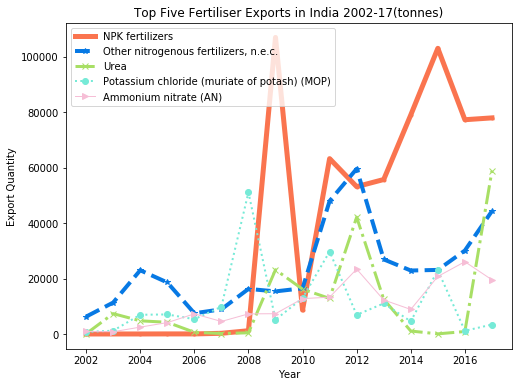

In [51]:
item = exp_qty.head()['Item'].unique()
k = 0
ls = ['-','--','-.',':','-']
mk = ['.','*','x','o','>']
plt.figure(figsize=(8,6))
for i in item:
    x = df.loc[df['Item'] == i]
    x = x.loc[df['Element Code'] == 5910]
    year = x['Year']
    value = x['Value']
    plt.xlabel('Year')
    plt.ylabel('Export Quantity')
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 5-k, marker = mk[k])
    k=k+1
    plt.legend()
plt.title('Top Five Fertiliser Exports in India 2002-17(tonnes)')

### observation
<p>The amount of export of NPK fertilizer was almost neglgible until 2008, after which it experienced a huge increase in export amount in 2009. A large drop came in 2010 but since then, the export qty has been somewhat steadily rising.</p>
<p>Export qty of other nitrogen fertilisers have also been in a steady increase throughout the years.</p>
<p>MOP reached its peak in 2008, after which it has been in decline.</p>
<p>Urea was also in decline from 2012, but had a surge in 2017.</p>

## Export Value

In [52]:
exp_val = df.loc[df['Element Code'] == 5922]
exp_val.drop(columns = {'Item Code','Element Code','Year'},inplace = True)
exp_val = exp_val.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
exp_val

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Item,Value
0,NPK fertilizers,235229.35
1,"Other nitrogenous fertilizers, n.e.c.",137518.46
2,Fertilizers n.e.c.,98424.43
3,Diammonium phosphate (DAP),73451.98
4,Ammonium nitrate (AN),70025.32
5,Urea,68301.13
6,Potassium chloride (muriate of potash) (MOP),66335.99
7,Potassium sulphate (sulphate of potash) (SOP),60707.25
8,Monoammonium phosphate (MAP),41985.16
9,Ammonium sulphate,27718.00


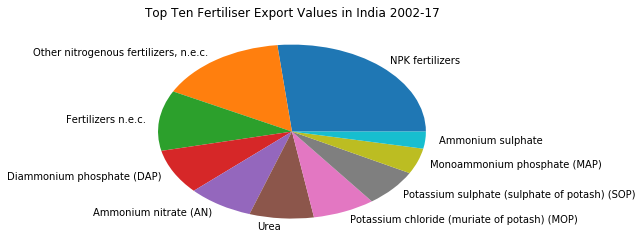

In [53]:
slices = exp_val.head(10)['Value']
labels = labels= exp_val.head(10)['Item']
plt.pie(slices, labels = labels)
plt.title('Top Ten Fertiliser Export Values in India 2002-17')
plt.show()

Text(0.5,1,'Top Five Fertiliser Export Values in India 2002-17(in $1000 US)')

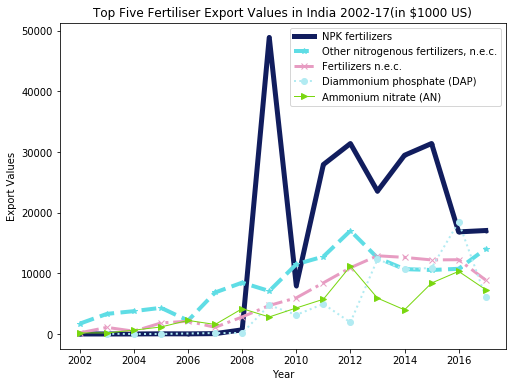

In [54]:
item = exp_val.head()['Item'].unique()
k = 0
ls = ['-','--','-.',':','-']
mk = ['.','*','x','o','>']
colors = ['#111d5e','#5fdde5','#e79cc2','#b2ebf2','#79d70f']
plt.figure(figsize=(8,6))
for i in item:
    x = df.loc[df['Item'] == i]
    x = x.loc[df['Element Code'] == 5922]
    year = x['Year']
    value = x['Value']
    plt.xlabel('Year')
    plt.ylabel('Export Values')
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 5-k, marker = mk[k])
    k=k+1
    plt.legend()
plt.title('Top Five Fertiliser Export Values in India 2002-17(in $1000 US)')

### observations
<p>The graph for NPK, other nitrogenous fertilisers and AN is simlar to Export Quantity.</p>
<p>Despite Urea and MOP being third and fourth respectively in Export Quantity, they are not present in the top five Export Values.</p> This might indicate India should focus on exporting other fertilers such as DAP which have more return

# Production

In [56]:
prod = df.loc[df['Element Code'] == 5510]
prod.drop(columns = {'Item Code','Element Code','Year'},inplace = True)
prod = prod.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
prod

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Item,Value
0,Urea,319586826.0
1,Diammonium phosphate (DAP),66855700.0
2,"Superphosphates, other",44290000.0
3,NPK fertilizers,21496700.0
4,Other NP compounds,19468300.0
5,Ammonium sulphate,9563700.0
6,Phosphate rock,5237000.0
7,Calcium ammonium nitrate (CAN) and other mixtu...,1556800.0
8,Potassium chloride (muriate of potash) (MOP),0.0
9,Potassium sulphate (sulphate of potash) (SOP),0.0


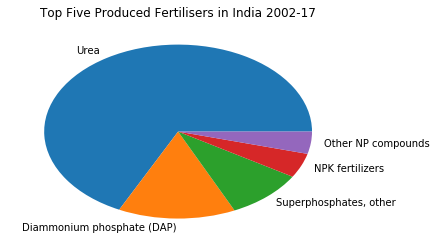

In [57]:
slices = prod.head()['Value']
labels = labels= prod.head()['Item']
plt.pie(slices, labels = labels)
plt.title('Top Five Produced Fertilisers in India 2002-17')
plt.show()

Text(0.5,1,'Top Five Produced Fertilisers in India 2002-17(in tonnes)')

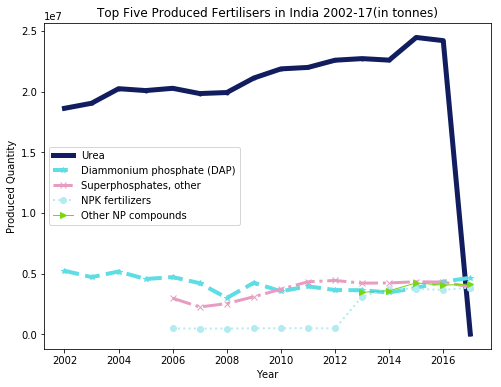

In [59]:
item = prod.head()['Item'].unique()
k = 0
ls = ['-','--','-.',':','-']
mk = ['.','*','x','o','>']
plt.figure(figsize=(8,6))
for i in item:
    x = df.loc[df['Item'] == i]
    x = x.loc[df['Element Code'] == 5510]
    year = x['Year']
    value = x['Value']
    plt.xlabel('Year')
    plt.ylabel('Produced Quantity')
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 5-k, marker = mk[k])
    k=k+1
    plt.legend()
plt.title('Top Five Produced Fertilisers in India 2002-17(in tonnes)')

### Observation
<p>Urea ahead of other fertilisers by a mile, but in 2017, its production dropped to zero.</p>
<p>There was very less production of NPK fertilisers in India until 2012. Since 2012, its production has increased and has remained constant.</p>
<p>The other three fertilisers followed a similar trend, thier only difference being the start of year of production.</p>

<p>Another inference that we can make out from this is that, NPK fertiliser(which was the most exported fetriliser in the country) that India exported before 2012, might have been from the imports.</p>

# Agricultural Use

In [60]:
agri = df.loc[df['Element Code'] == 5157]
agri.drop(columns = {'Item Code','Element Code','Year'},inplace = True)
agri = agri.groupby(['Item'])["Value"].sum().reset_index().sort_values("Value",ascending=False).reset_index(drop=True)
agri

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Item,Value
0,Urea,423780110.0
1,Diammonium phosphate (DAP),130281260.0
2,"Superphosphates, other",47690370.0
3,Other NP compounds,45120900.0
4,Potassium chloride (muriate of potash) (MOP),42108810.0
5,Ammonium sulphate,38209790.0
6,NPK fertilizers,25636950.0
7,Potassium sulphate (sulphate of potash) (SOP),4085860.0
8,Calcium ammonium nitrate (CAN) and other mixtu...,1562850.0
9,Monoammonium phosphate (MAP),1035980.0


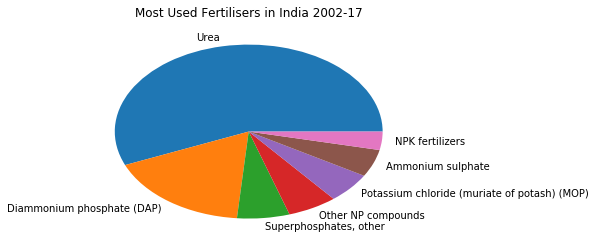

In [61]:
slices = agri.head(7)['Value']
labels = labels= agri.head(7)['Item']
plt.pie(slices, labels = labels)
plt.title('Most Used Fertilisers in India 2002-17')
plt.show()

Text(0.5,1,'Most Used Fertilisers in India 2002-17(in tonnes)')

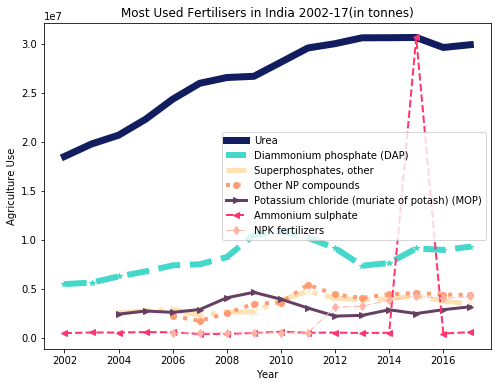

In [62]:
plt.figure(figsize=(8,6))
item = agri.head(7)['Item'].unique()
k = 0
ls = ['-','--','-.',':','-','--','-.']
mk = ['.','*','x','o','>','<','d']
colors = ['#111d5e','#43d8c9','#fee2b3','#ff9c71','#654062','#fe346e','#ffb2a7']
for i in item:
    x = df.loc[df['Item'] == i]
    x = x.loc[df['Element Code'] == 5157]
    year = x['Year']
    value = x['Value']
    plt.xlabel('Year')
    plt.ylabel('Agriculture Use')
    plt.plot(year, value, label = i, color = colors[k], linestyle=ls[k],linewidth = 7-k, marker = mk[k])
    k=k+1
    plt.legend()
plt.title('Most Used Fertilisers in India 2002-17(in tonnes)')

### Observation
Again, Urea holds a major chunk of the total used fertilisers

# Conclusion
<p>Urea is the most used fertiliser in India over the years, and its use was in constant increase over the years.</p>
<p>Ammonium Sulphate had an uncharacteristic increased use in 2015. All the other years, its use was very less.</p>
<p>NPK Fertilizer's use was also very low until 2012. This trend is in line with the production of fertilizers, wherein 2012 was the year where India started to produce NPK</p>

# Questions

After analysing the use of the fertilisers and their import/export trends across the years, this raises some questions-

<p>What happened in 2017?</p>
<p>India imported Urea in a large scale till 2016, but after that its production as well as import decreased significantly.</p> <p>Did the government made some policy changes in 2017 which led to this? Or there were some other reasons?</p>
<p>Why was there a sudden huge spike in the Agricultural Use of Ammonium Sulphate in 2015?</p>
<p>As we have seen, before 2012, there was no production of NPK, but it was still the highest exported fertiliser. One can assume that India imported it and then used it for export in other countries. What did India do exactly to gain profit in this method?</p>